###Titulo: Mineria de Datos
###Autor: Jaider David Daza Pardo


a. <font color="blue">Random Forest Classifier: </font>El clasificador de Random Forest es un algoritmo de aprendizaje automático que se utiliza principalmente para tareas de clasificación y regresión. Combina múltiples árboles de decisión para mejorar la precisión del modelo y reducir el sobreajuste. Es especialmente útil cuando se trabaja con datos complejos o con muchas características, ya que puede manejar la importancia de las características automáticamente.

b. <font color="blue">Stochastic Gradient Descent Classifier:</font> El clasificador de Descenso de Gradiente Estocástico (SGD) es un algoritmo de aprendizaje automático que se utiliza para entrenar modelos de clasificación y regresión. Se basa en la optimización de la función de pérdida utilizando el descenso de gradiente. Es eficiente y puede manejar grandes conjuntos de datos, lo que lo hace útil en aplicaciones donde se requiere velocidad y escalabilidad.

c. <font color="blue">Support Vector Classifier (SVC):</font> El Clasificador de Vectores de Soporte (SVC) es un algoritmo de aprendizaje automático que se utiliza para tareas de clasificación. Su objetivo principal es encontrar un hiperplano que separe de manera óptima las clases en un espacio de características. Es especialmente efectivo en problemas de clasificación binaria y puede manejar datos no lineales mediante el uso de kernels. El SVC es útil cuando se necesita un alto grado de precisión en la clasificación y cuando se trabaja con datos que no son linealmente separables.
Espero que estas de

In [0]:
#C. Importar al cuaderno las bibliotecas anteriores

# Importar Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Importar Stochastic Gradient Descent Classifier
from sklearn.linear_model import SGDClassifier

# Importar Support Vector Classifier (SVC)
from sklearn.svm import SVC


#Imports Adicionales requeridos:
import pandas as pd #=== tratamiento de datos  en un marco (dataframe)
import numpy as np #=== NUmerical Python: matemáticas 
import seaborn as sns #=== Versatil para Estadisitica y Visualización 
import matplotlib.pyplot as plt #==== para visualización de datos 

In [0]:
#D. Cargar desde el ENLACE , a objeto dataframe el fichero csv de calidad del vino.

#se importan los datos del repositorio
url = "https://raw.githubusercontent.com/corredor-john/ExploratoryDataAnalisys/main/Varios/winequality-red.csv"

# se hace el objeto dataframe (marco de tratamiento)
df_vinos = pd.read_csv(url, sep=";")

In [0]:
#E. Presentar información sobre las columnas de los datos de la calidad del vino.

df_vinos.info()
df_vinos.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


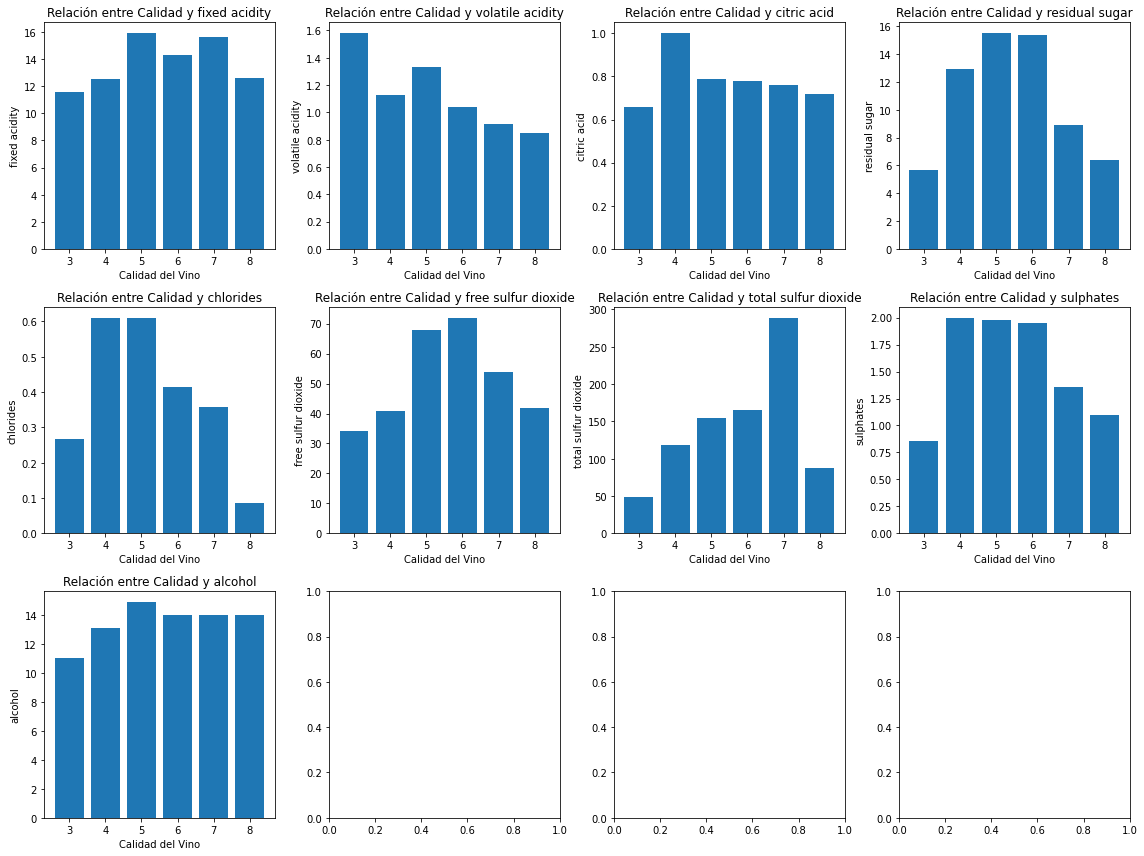

In [0]:
#F. Presentar gráficas de barras sobre la calidad del vino en relación con las demás columnas:

# Crear subplots para todas las columnas excepto "quality", "density" y "pH"
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))

# Lista de todas las columnas excepto "quality", "density" y "pH"
columnas = [col for col in df_vinos.columns if col not in ['quality', 'density', 'pH']]

# Iterar a través de las columnas y graficar la relación con la calidad
for i, columna in enumerate(columnas):
    row = i // 4
    col = i % 4
    axes[row, col].bar(df_vinos['quality'], df_vinos[columna])
    axes[row, col].set_xlabel('Calidad del Vino')
    axes[row, col].set_ylabel(columna)
    axes[row, col].set_title(f'Relación entre Calidad y {columna}')

# Ajustar el diseño de los subplots
plt.tight_layout()
plt.show()


In [0]:
#G.1. Hacer una clasificación binaria de la variable respuesta (“calidad”): dividir el vino en bueno y malo dando el límite para la calidad 

from sklearn.preprocessing import LabelEncoder

clases = (2, 6.5, 8)
grupos_nombres = ['malo', 'bueno']
df_vinos['quality'] = pd.cut(df_vinos['quality'], bins=clases, labels=grupos_nombres)
calidad_etiqueta = LabelEncoder()
df_vinos['quality'] = calidad_etiqueta.fit_transform(df_vinos['quality'])
df_vinos.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,1
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,1
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,0
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,0
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,1


In [0]:
#G.2. Separar el dataset en entrenamiento y prueba, con el 20% para prueba

from sklearn.model_selection import train_test_split

import plotly.graph_objects as go

# Dividir el conjunto de datos en entrenamiento y prueba (80% entrenamiento, 20% prueba)
X = df_vinos.drop(columns=['quality'])  # Características
y = df_vinos['quality']  # Variable objetivo

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=40)

data_train=pd.concat([X_train,y_train],axis=1)
data_test= pd.concat([X_test,y_test],axis=1)

#Comparacion de cantidad de grupos
valor=np.array([len(data_train),len(data_test)])
etiquetas= ['Training','Test']
figura=go.Figure(data=[go.Pie(values=valor,
                             labels=etiquetas,
                             hole=0.35,
                             title="")])
titulo="Comparacion grupos de Entrenamiento y Prueba"
figura.update_layout(height=450,width=650,title=titulo)
figura.show()

In [0]:
#G.3. Aplicar el escalador standard para tener resultados optimizados (StandardScaler( ))

from sklearn.preprocessing import StandardScaler

# Crear una instancia del escalador
sc = StandardScaler()

# Ajustar y transformar las características de entrenamiento
X_train = sc.fit_transform(X_train)

# Solo transformar las características de prueba (NO ajustar nuevamente)
X_test = sc.transform(X_test)

In [0]:
#G.4. Aplicar el randomforestClassifier (n_estimators = 200)

# Crear una instancia del clasificador Random Forest con 200 estimadores
clf = RandomForestClassifier(n_estimators=200, random_state=40)

# Entrenar el modelo en el conjunto de entrenamiento
clf.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = clf.predict(X_test)

In [0]:
#G.5. Presente un reporte de clasificación

from sklearn.metrics import classification_report, accuracy_score

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

# Calcular el informe de clasificación
class_report = classification_report(y_test, y_pred, target_names=["malo", "bueno"])

# Imprimir las métricas
print("Precisión del modelo:", accuracy)
print("\nInforme de Clasificación:\n", class_report)


Precisión del modelo: 0.909375

Informe de Clasificación:
               precision    recall  f1-score   support

        malo       0.81      0.52      0.63        48
       bueno       0.92      0.98      0.95       272

    accuracy                           0.91       320
   macro avg       0.86      0.75      0.79       320
weighted avg       0.90      0.91      0.90       320



In [0]:
#G.6. Presente y explique la matriz de confusión
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nMatriz de Confusión:\n", conf_matrix)

#Tienes 25 verdaderos positivos (el modelo predijo "bueno" y era realmente "bueno").
#Tienes 23 falsos positivos (el modelo predijo "bueno," pero era realmente "malo").
#Tienes 6 falsos negativos (el modelo predijo "malo," pero era realmente "bueno").
#Tienes 266 verdaderos negativos (el modelo predijo "malo" y era realmente "malo").


Matriz de Confusión:
 [[ 25  23]
 [  6 266]]


In [0]:
#G.7. Aplique el clasificador Stochastic Gradient Descent y presente el reporte de clasificación

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Crear una instancia del clasificador SGD
clf_sgd = SGDClassifier(random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
clf_sgd.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred_sgd = clf_sgd.predict(X_test)

# Calcular la precisión
accuracy_sgd = accuracy_score(y_test, y_pred_sgd)

# Calcular la matriz de confusión
conf_matrix_sgd = confusion_matrix(y_test, y_pred_sgd)

# Calcular el informe de clasificación
class_report_sgd = classification_report(y_test, y_pred_sgd, target_names=["malo", "bueno"])

# Imprimir las métricas
print("Precisión del modelo (SGD):", accuracy_sgd)
print("\nMatriz de Confusión (SGD):\n", conf_matrix_sgd)
print("\nInforme de Clasificación (SGD):\n", class_report_sgd)



Precisión del modelo (SGD): 0.85

Matriz de Confusión (SGD):
 [[  0  48]
 [  0 272]]

Informe de Clasificación (SGD):
               precision    recall  f1-score   support

        malo       0.00      0.00      0.00        48
       bueno       0.85      1.00      0.92       272

    accuracy                           0.85       320
   macro avg       0.42      0.50      0.46       320
weighted avg       0.72      0.85      0.78       320



/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/databricks/python/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

